<h1 style='background: black; border:1; color: white'><center>💰 All Indian IPO 💹 </center></h1>

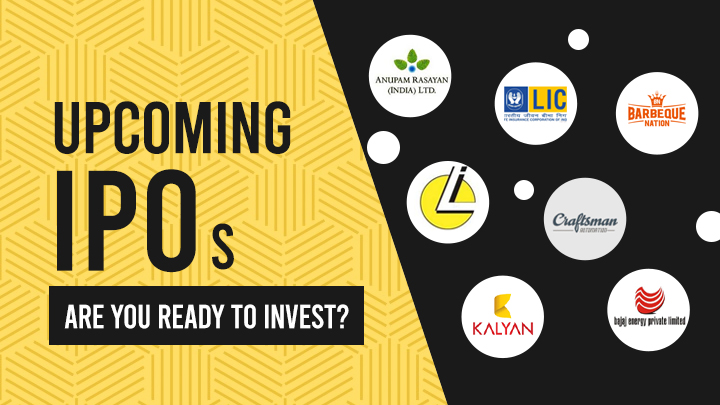

# Exploratory data analysis on IPOs of India. 

The dataset contains all the IPOs, and their information in Indian stock market from 2010 till date. The dataset has the following columns :

* Date
* IPO Name
* Issue size
* QIB - Qualified Institutional Buyer
* HNI - High Networth Individuals
etc

[Image Link](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.finnovationz.com%2Fblog%2Fupcoming-ipos-in-india&psig=AOvVaw1CeD6mud6Q5Bok6gr2rWVO&ust=1630164702359000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCIj4_PTC0fICFQAAAAAdAAAAABAD)

This visualization will give you a brief idea about indian corporate eco-system.

If you like this EDA please consider **upvoting**.

<h2 style='background: black; border:1; color: white'><center>Table of contents </center></h2>


* [Import](#chapter1)
* [Data Cleaning](#chapter2)
* [Data Visualization :](#chapter3)
    * [ Basic observations ](#chapter13)
    * [Plotting function :](#chapter4)
    * [Word Art of countries](#chapter5)
* [Listing gains of Companies](#chapter6)
* [20 companies with highest listing gains](#chapter7)
* [20 companies with lowest listing gains](#chapter8)
* [Current gains of Companies](#chapter9)
* [Total IPO from 2010 - 2021 in each Year](#chapter10)
* [Pie chart of IPO from 2010 - 2021](#chapter14)
* [Total IPO from 2010 - 2021 in each month](#chapter11)
* [Top 10 companies wrt Issue size ](#chapter12)

# Import Section : <a class="anchor" id="chapter1"></a>

In [ ]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
df = pd.read_csv('../input/all-ipo-stocks-of-moneycontrol/IPO.csv')
df.head()

# Data Cleaning : <a class="anchor" id="chapter2"></a>

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
date = df.Date.str.split('-', expand =True)
date 

In [ ]:
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]

df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

Here I added three new columns viz year, month and date

In [ ]:
df.head()

In [ ]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
# removing ','
for i in range(len(df)) : 
    data = ''
    for j in range(len(df.CMP[i])) : 
        if df.CMP[i][j] != ',' : 
            data += df.CMP[i][j]
    df.CMP[i] = (data)

df.CMP = df.CMP.astype(float)

In [ ]:
# filling null values with actual value 
df.Current_gains.fillna(value = ((df.CMP - df.Issue_price)/df.Issue_price)*100, inplace = True)

In [ ]:
# changing the col name 
df.rename(columns={"Issue_Size(crores)": "Issue_size", "Listing_Gains(%)": "Listing_gains"}, inplace = True)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.head()

# Data Visualization : <a class="anchor" id="chapter3"></a>

## Basic observations  <a class="anchor" id="chapter13"></a>

In [ ]:
print('Company with highest Issue size -->',df.sort_values(by = ['Issue_size'], ascending = False).head(1).IPO_Name)
print('Company with highest QIB -->',df.sort_values(by = ['QIB'], ascending = False).head(1).IPO_Name)
print('Company with highest HNI -->',df.sort_values(by = ['HNI'], ascending = False).head(1).IPO_Name)
print('Company with highest RII -->',df.sort_values(by = ['RII'], ascending = False).head(1).IPO_Name) 
print('Company with highest Listing gains -->',df.sort_values(by = ['Listing_gains'], ascending = False).head(1).IPO_Name)
print('Company with highest Current gains -->',df.sort_values(by = ['Current_gains'], ascending = False).head(1).IPO_Name)

## Word Art of countries <a class="anchor" id="chapter4"></a>

In [ ]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.IPO_Name))

plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

## Plotting function : <a class="anchor" id="chapter5"></a>

In [ ]:
# plot update function
def update_layout(title, xaxis_title = None, yaxis_title = None, legend_title = None, xgrid = False, ygrid = True) : 

    fig.update_layout(
        title={
                'text' : title,
                'y':0.95,
                'x':0.5
            },
        font_family="Palatino",
        title_font_family="Times New Roman",
        title_font_color="#2e2c61",    
        title_font_size = 22,       
        xaxis_title= xaxis_title,
        yaxis_title= yaxis_title,
        font_color="#262424",
        paper_bgcolor='white',
        plot_bgcolor='white',
        )

    try : 
        fig.update_layout(
            legend_title = legend_title,
            legend_title_font_color="green"
        )
    except : 
        pass
    if xgrid == True : 
        if ygrid == False :
            fig.update_xaxes(showline=True, linewidth=2, 
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
        else : 
            fig.update_xaxes(showline=True, linewidth=2,
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
            fig.update_yaxes(showline=True, linewidth=2,
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
    else : 
        fig.update_xaxes(showline=True, linewidth=2,
                        linecolor='#626969', showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2,
                        linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")

    fig.show()

# Listing gains of Companies <a class="anchor" id="chapter6"></a>

In [ ]:
fig = px.bar(df, x = 'Listing_gains', y = 'IPO_Name')
update_layout('Listing gains of Companies', 'Listing Gain', 'Company')

# 20 companies with highest listing gains <a class="anchor" id="chapter1"></a>

* Birla Pacific has the max listing gain of 153.5%
* then we have got Salasar Techno with 151.94% listing gains 
* then we have Astron Paper, Burger King, IRCTC and so on...

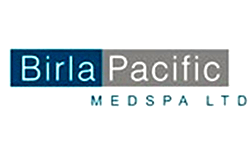

In [ ]:
goodListingGains = df[df.Listing_gains > 0]
goodListingGains.sort_values(by = ['Listing_gains'], ascending = True, inplace = True)

fig = px.bar(goodListingGains.tail(20), x = 'Listing_gains', y = 'IPO_Name', )
update_layout('20 companies with highest listing gains', 'Listing Gain', 'Company')

# 20 companies with lowest listing gains <a class="anchor" id="chapter1"></a>

* VKS Projects has the lowest listing gains -97.15% 
* then we have got Inveture grow, NBCC, BS Limited and all...

In [ ]:
badListingGains = df[df.Listing_gains < 0]
badListingGains.sort_values(by = ['Listing_gains'], inplace = True)

fig = px.bar(badListingGains.head(20), x = 'Listing_gains', y = 'IPO_Name')
update_layout('20 companies with lowest listing gains', 'Listing Gain', 'Company')

# Current gains of Companies <a class="anchor" id="chapter9"></a>

Jubilant foods has given the highest return in long term...

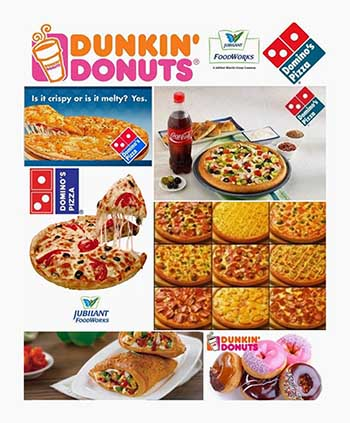

In [ ]:
fig = px.bar(df.sort_values(by = ['Current_gains'], ascending = False) , y = 'Current_gains', x = 'IPO_Name')
update_layout('Current gains of Companies', 'Company', 'Listing Gain')

# Total IPO from 2010 - 2021 in each Year <a class="anchor" id="chapter10"></a>

This dataset contains data from 2010 to till date, <br>
Here **10 stands for 2010** <br>
**11 for 2011** and so on...

In [ ]:
yearDf = df.groupby(['year']).count()
yearDf.reset_index(inplace = True)
fig = px.bar(yearDf , x = 'year', y = 'IPO_Name')
update_layout('Total IPO from 2010 - 2021', 'Year', 'Total IPO')

# Pie chart of IPO from 2010 - 2021 <a class="anchor" id="chapter14"></a>

In [ ]:
fig = px.pie(df, values='year', names='year')
update_layout('Pie chart of IPO from 2010 - 2021')

# Total IPO from 2010 - 2021 in each month <a class="anchor" id="chapter11"></a>

January - 1 <br>
February - 2 <br>
March - 3 <br>
April - 4 <br>
May - 5 <br>
June - 6 <br>
July - 7 <br>
August - 8 <br>
September - 9 <br>
October - 10 <br>
November - 11 <br>
December - 12 <br>

In [ ]:
monthDf = df.groupby(['month']).count()
monthDf.reset_index(inplace = True)
fig = px.bar(monthDf , x = 'month', y = 'IPO_Name')
update_layout('Total IPO from 2010 - 2021', 'Month', 'Total IPO')

# Top 10 companies wrt Issue size <a class="anchor" id="chapter12"></a>

* Coal India has brought the biggest IPO so far with issue size of 15.47k
* Then we have General Insuran with 11.37k issue size 
* then we have SBI, Zomato and so on...

In [ ]:
fig = px.bar(df.sort_values(by = ['Issue_size'], ascending = False).head(10) , y = 'Issue_size', x = 'IPO_Name')
update_layout('Top 10 companies wrt Issue size', 'Company', 'Issue Size')

If you Liked my EDA then do **upvote**. That really motivates a lot...

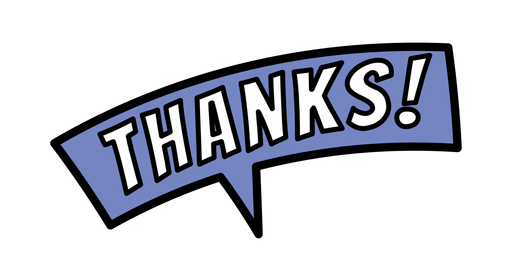